<a href="https://colab.research.google.com/github/Ivan-Arias/Covid-19-Mov/blob/main/CovidChile_ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104618 entries, 0 to 104617
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Region             104618 non-null  object 
 1   Codigo region      104618 non-null  int64  
 2   Comuna             104618 non-null  object 
 3   Codigo comuna      99994 non-null   float64
 4   Poblacion          99994 non-null   float64
 5   Fecha              104618 non-null  object 
 6   Casos confirmados  104199 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ MB
Covid-19_std dataset info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Columns: 363 entries, Region to Magallanes.11
dtypes: object(363)
memory usage: 833.9+ KB
Covid-19_T dataset info:
 None
<class 'pandas.core.frame.DataFr

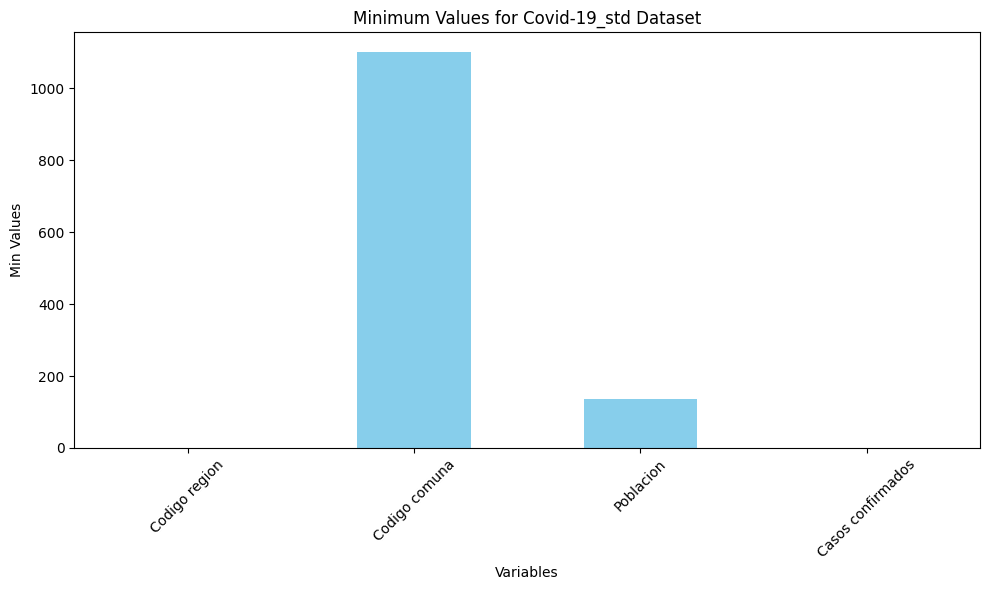

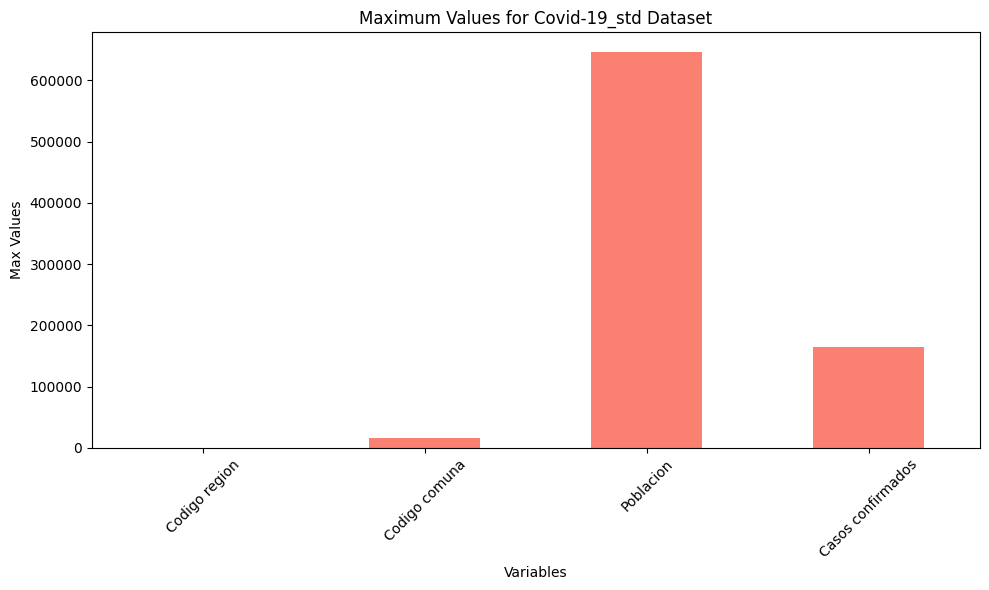

<ipython-input-2-23f665115bb2>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Casos confirmados', y='Region', data=cases_by_region, palette='viridis')


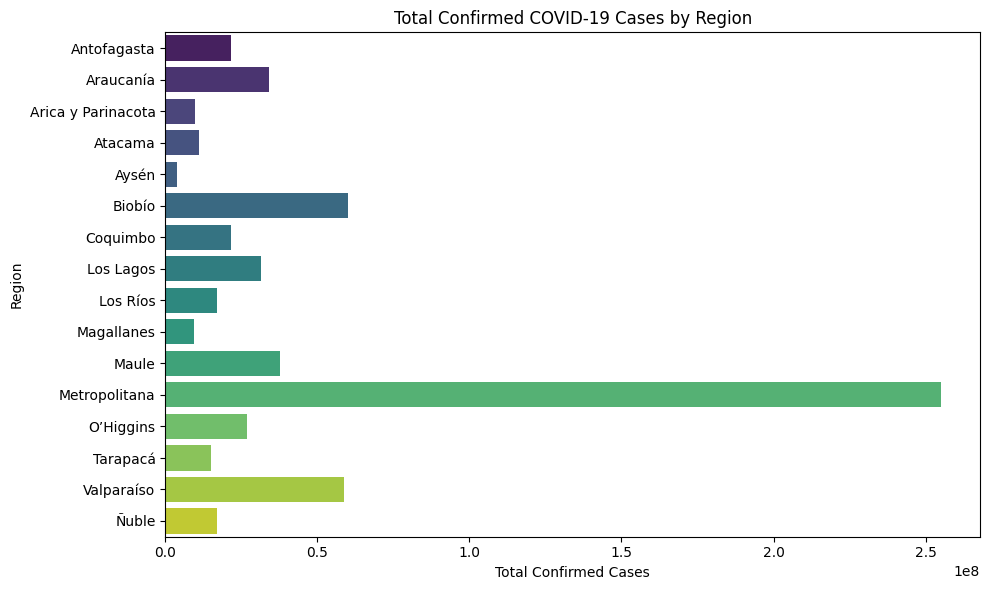

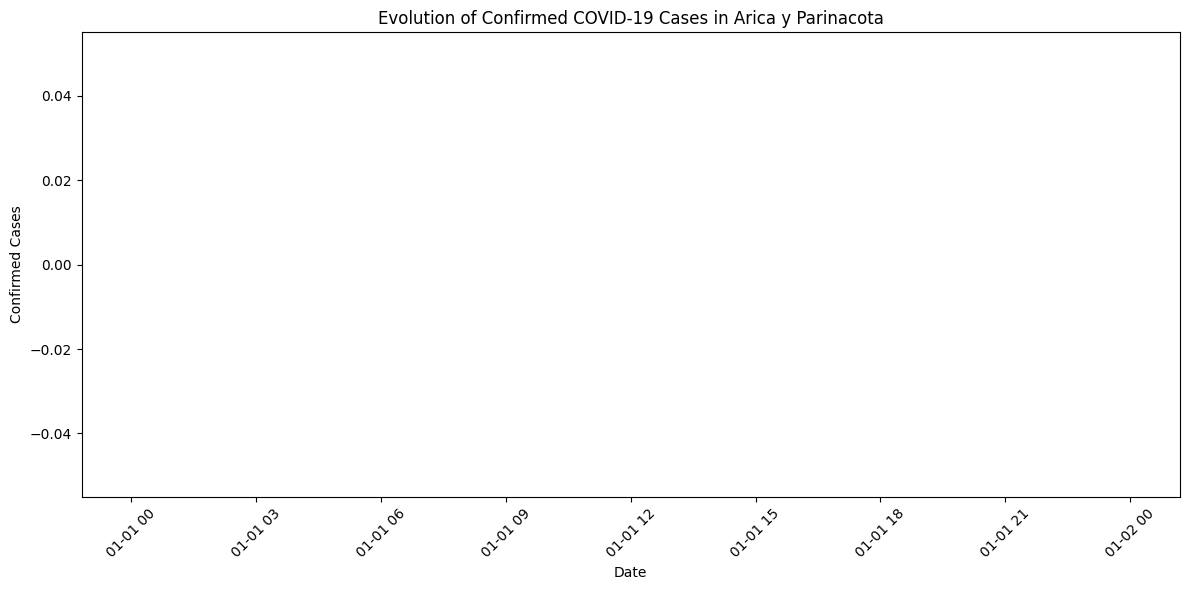

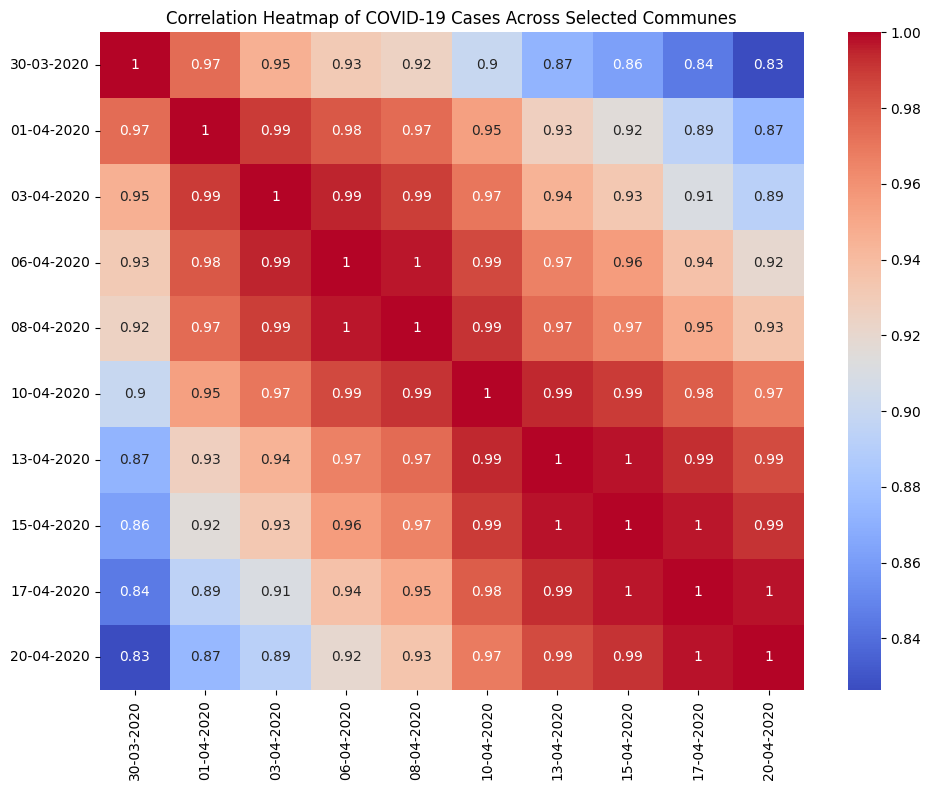

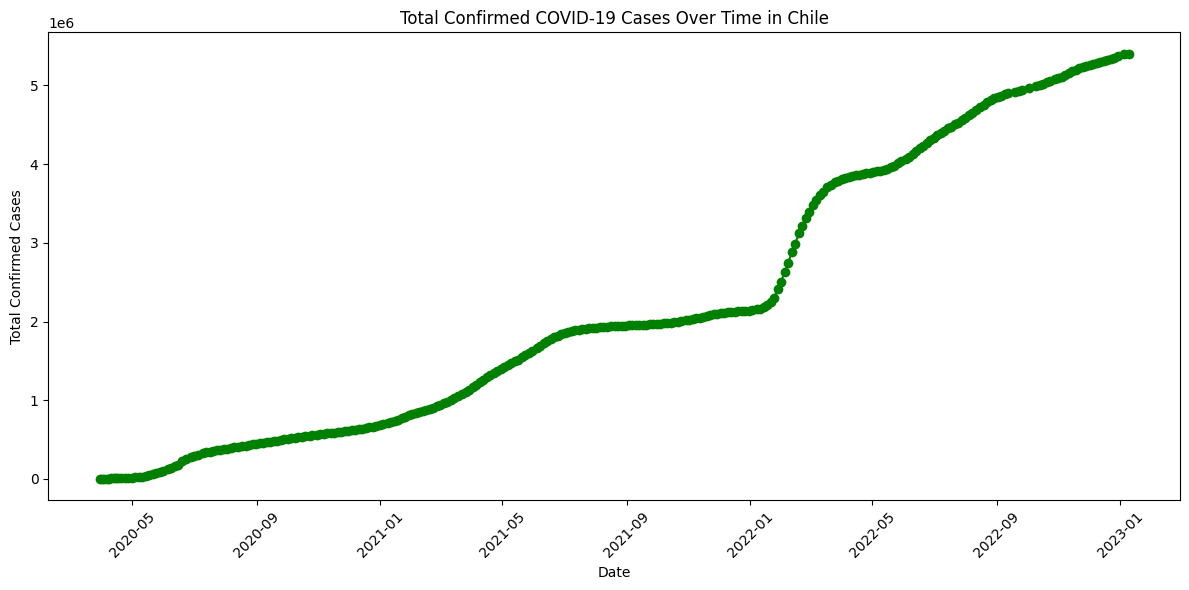

<ipython-input-2-23f665115bb2>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Casos confirmados', data=df_std, palette='Set3')


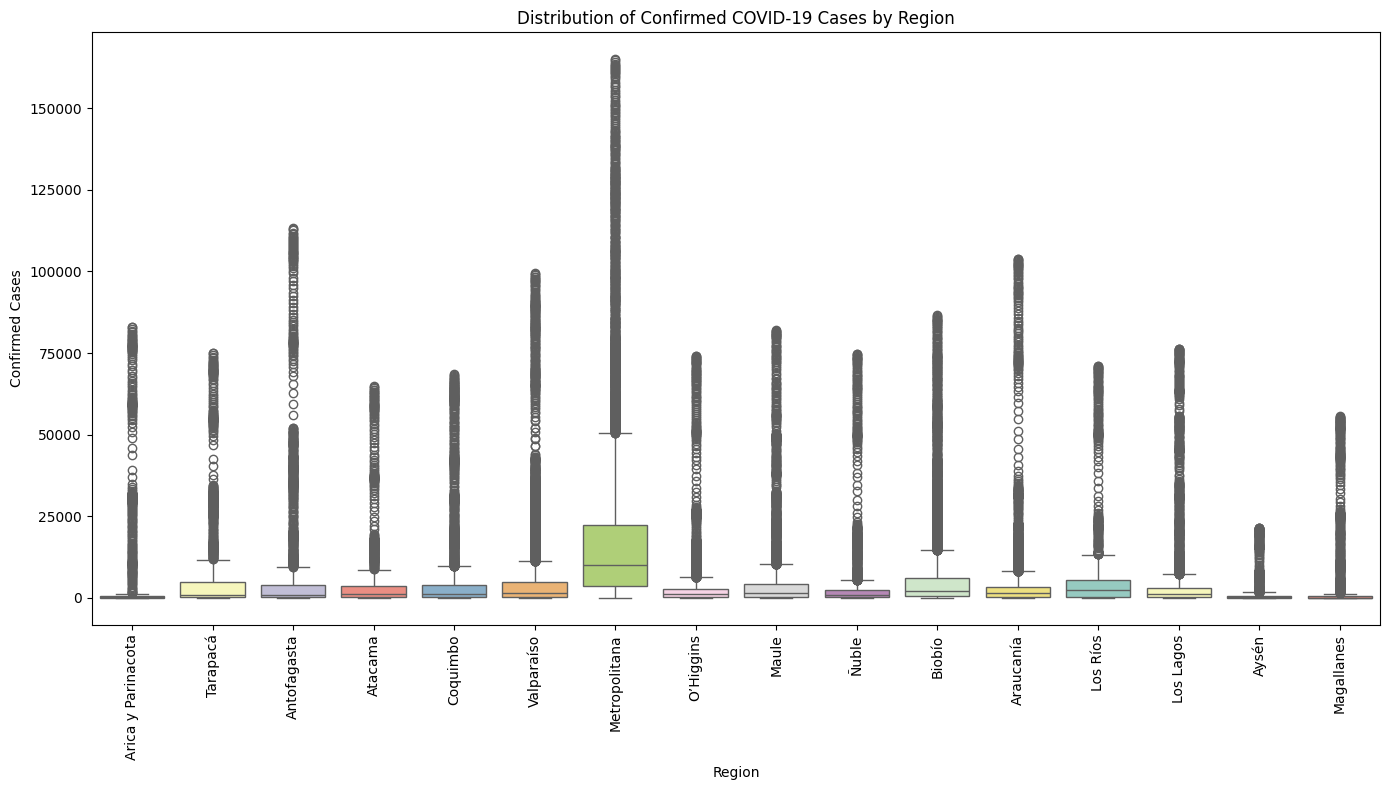

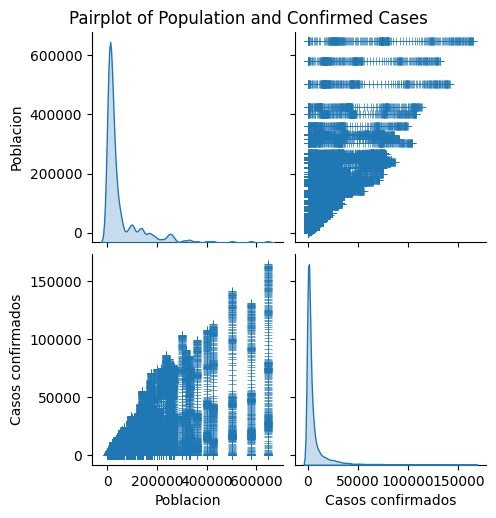

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File paths (update if needed)
file_paths = {
    "Covid-19_std": "/content/drive/MyDrive/_2_UNIVERSIDAD/maestria/baseDeDatos_Chile/producto1/Covid-19_std.csv",
    "Covid-19_T": "/content/drive/MyDrive/_2_UNIVERSIDAD/maestria/baseDeDatos_Chile/producto1/Covid-19_T.csv",
    "Covid-19": "/content/drive/MyDrive/_2_UNIVERSIDAD/maestria/baseDeDatos_Chile/producto1/Covid-19.csv"
}

# Load datasets
df_std = pd.read_csv(file_paths["Covid-19_std"])
df_t = pd.read_csv(file_paths["Covid-19_T"])
df = pd.read_csv(file_paths["Covid-19"])

# Data Cleaning and Exploration
# 1. Display basic information about the datasets
print("Covid-19_std dataset info:\n", df_std.info())
print("Covid-19_T dataset info:\n", df_t.info())
print("Covid-19 dataset info:\n", df.info())

# 2. Handle missing values - For simplicity, drop rows with missing values
df_std.dropna(inplace=True)
df_t.dropna(inplace=True)
df.dropna(inplace=True)

# 3. Convert date columns to datetime where applicable
df_std['Fecha'] = pd.to_datetime(df_std['Fecha'], format='%d-%m-%Y')

# 4. Basic Statistics - Summary statistics for each dataset
print("\nCovid-19_std summary:\n", df_std.describe())
print("\nCovid-19_T summary:\n", df_t.describe())
print("\nCovid-19 summary:\n", df.describe())

# 5. Min and Max values for each dataset
print("\nCovid-19_std Min values:\n", df_std.min())
print("\nCovid-19_std Max values:\n", df_std.max())
print("\nCovid-19_T Min values:\n", df_t.min())
print("\nCovid-19_T Max values:\n", df_t.max())
print("\nCovid-19 Min values:\n", df.min())
print("\nCovid-19 Max values:\n", df.max())

# Plot Min and Max values for Covid-19_std dataset
min_values_std = df_std.min(numeric_only=True)
max_values_std = df_std.max(numeric_only=True)

# Plotting Min Values
plt.figure(figsize=(10, 6))
min_values_std.plot(kind='bar', color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Min Values')
plt.title('Minimum Values for Covid-19_std Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Max Values
plt.figure(figsize=(10, 6))
max_values_std.plot(kind='bar', color='salmon')
plt.xlabel('Variables')
plt.ylabel('Max Values')
plt.title('Maximum Values for Covid-19_std Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Analysis
# 1. Total Cases by Region
cases_by_region = df_std.groupby('Region')['Casos confirmados'].sum().reset_index()

# Plot total cases by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Casos confirmados', y='Region', data=cases_by_region, palette='viridis')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Region')
plt.title('Total Confirmed COVID-19 Cases by Region')
plt.tight_layout()
plt.show()

# Export total cases by region to JSON for D3.js
cases_by_region_dict = cases_by_region.to_dict(orient='records')
with open('/content/drive/MyDrive/cases_by_region.json', 'w') as json_file:
    json.dump(cases_by_region_dict, json_file, default=str)

# 2. Evolution of Cases Over Time for a Specific Region
# Filter data for a specific region (e.g., 'Arica y Parinacota')
region_data = df[df['Region'] == 'Arica y Parinacota']
region_data = region_data.drop(columns=['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion']).T.reset_index()
region_data.columns = ['Date'] + region_data.columns[1:].tolist()
region_data = pd.melt(region_data, id_vars=['Date'], var_name='Commune', value_name='Confirmed Cases')
region_data = region_data[region_data['Confirmed Cases'].notna()]
region_data['Date'] = pd.to_datetime(region_data['Date'], format='%Y-%m-%d', errors='coerce')
region_data.dropna(subset=['Date'], inplace=True)

# Plot evolution of cases over time
plt.figure(figsize=(12, 6))
plt.plot(region_data['Date'], region_data['Confirmed Cases'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Evolution of Confirmed COVID-19 Cases in Arica y Parinacota')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Export evolution of cases over time to JSON for D3.js
region_data_dict = region_data[['Date', 'Confirmed Cases']].to_dict(orient='records')
with open('/content/drive/MyDrive/evolution_cases_arica.json', 'w') as json_file:
    json.dump(region_data_dict, json_file, default=str)

# 3. Heatmap of Cases Across Different Communes and Dates
# Extract a subset of data for the heatmap (first few communes and dates)
commune_dates = df.iloc[:, 5:15]
plt.figure(figsize=(10, 8))
sns.heatmap(commune_dates.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of COVID-19 Cases Across Selected Communes')
plt.tight_layout()
plt.show()

# 4. Additional Analysis and Visualizations
# 4.1. Cases by Date - Line Plot for All Regions
cases_by_date = df_std.groupby('Fecha')['Casos confirmados'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(cases_by_date['Fecha'], cases_by_date['Casos confirmados'], marker='o', linestyle='-', color='g')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed COVID-19 Cases Over Time in Chile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Export cases by date to JSON for D3.js
cases_by_date_dict = cases_by_date.to_dict(orient='records')
with open('/content/drive/MyDrive/cases_by_date.json', 'w') as json_file:
    json.dump(cases_by_date_dict, json_file, default=str)

# 4.2. Boxplot of Cases by Region
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Casos confirmados', data=df_std, palette='Set3')
plt.xlabel('Region')
plt.ylabel('Confirmed Cases')
plt.title('Distribution of Confirmed COVID-19 Cases by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4.3. Pairplot to Analyze Relationships Between Numerical Features
sns.pairplot(df_std[['Poblacion', 'Casos confirmados']], diag_kind='kde', markers='+')
plt.suptitle('Pairplot of Population and Confirmed Cases', y=1.02)
plt.show()


# Producto 33

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import plotly.express as px

# Montar Google Drive
drive.mount('/content/drive')

# Cargar el archivo CSV
data_path = '/content/drive/MyDrive/_2_UNIVERSIDAD/maestria/baseDeDatos_Chile/Nuevo_IndiceDeMovilidad.csv'
df = pd.read_csv(data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# Verificar las primeras filas del dataframe
print("Primeras filas del dataframe:")
print(df.head())


Primeras filas del dataframe:
   Region  Codigo region       Comuna  Codigo comuna  Superficie_km2  \
0  Biobío            8.0  Alto Biobío           8314         2124.77   
1  Biobío            8.0  Alto Biobío           8314         2124.77   
2  Biobío            8.0  Alto Biobío           8314         2124.77   
3  Biobío            8.0  Alto Biobío           8314         2124.77   
4  Biobío            8.0  Alto Biobío           8314         2124.77   

   Poblacion  IM_interno  IM_externo        IM       Fecha  
0     6775.0    0.292276    0.554280  0.846555  2020-02-26  
1     6775.0    0.337161    0.465553  0.802714  2020-02-27  
2     6775.0    0.383090    0.551148  0.934238  2020-02-28  
3     6775.0    0.545929    0.849687  1.395616  2020-02-29  
4     6775.0    0.440501    0.739040  1.179541  2020-03-01  


In [4]:

# Verificar las últimas filas del dataframe
print("\nÚltimas filas del dataframe:")
print(df.tail())


Últimas filas del dataframe:
              Region  Codigo region    Comuna  Codigo comuna  Superficie_km2  \
132021  La Araucanía            9.0  Traiguén           9210          897.07   
132022  La Araucanía            9.0  Traiguén           9210          897.07   
132023  La Araucanía            9.0  Traiguén           9210          897.07   
132024           NaN            NaN       NaN          11302         7781.76   
132025           NaN            NaN       NaN          12202      1250257.60   

        Poblacion  IM_interno  IM_externo        IM       Fecha  
132021    19314.0    4.120789    3.351299  7.472089  2021-03-26  
132022    19314.0    2.563041    1.472089  4.035130  2021-03-27  
132023    19314.0    2.394129    1.271415  3.665544  2021-03-28  
132024      661.0         NaN         NaN       NaN         NaN  
132025      137.0         NaN         NaN       NaN         NaN  


In [5]:


# Verificar información general del dataframe
print("\nInformación general del dataframe:")
print(df.info())



Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132026 entries, 0 to 132025
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          132024 non-null  object 
 1   Codigo region   132024 non-null  float64
 2   Comuna          132024 non-null  object 
 3   Codigo comuna   132026 non-null  int64  
 4   Superficie_km2  132026 non-null  float64
 5   Poblacion       132026 non-null  float64
 6   IM_interno      132024 non-null  float64
 7   IM_externo      132024 non-null  float64
 8   IM              132024 non-null  float64
 9   Fecha           132024 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.1+ MB
None


In [6]:

# Obtener nombres de columnas
columnas = df.columns.tolist()
print("\nColumnas del dataframe:")
print(columnas)



Columnas del dataframe:
['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Superficie_km2', 'Poblacion', 'IM_interno', 'IM_externo', 'IM', 'Fecha']


In [7]:

# Calcular los valores máximos y mínimos de cada columna numérica
valores_maximos = df.max(numeric_only=True).to_dict()
valores_minimos = df.min(numeric_only=True).to_dict()

print("\nValores máximos de cada columna:")
print(valores_maximos)
print("\nValores mínimos de cada columna:")
print(valores_minimos)



Valores máximos de cada columna:
{'Codigo region': 16.0, 'Codigo comuna': 16305.0, 'Superficie_km2': 1250257.6, 'Poblacion': 645909.0, 'IM_interno': 25.444462809917358, 'IM_externo': 68.7751524390244, 'IM': 86.4466463414634}

Valores mínimos de cada columna:
{'Codigo region': 1.0, 'Codigo comuna': 1101.0, 'Superficie_km2': 6.31, 'Poblacion': 137.0, 'IM_interno': 0.0, 'IM_externo': 0.0, 'IM': 0.0}


In [8]:

# Contar los valores nulos por cada columna
valores_nulos = df.isnull().sum().to_dict()
print("\nCantidad de valores nulos por columna:")
print(valores_nulos)


Cantidad de valores nulos por columna:
{'Region': 2, 'Codigo region': 2, 'Comuna': 2, 'Codigo comuna': 0, 'Superficie_km2': 0, 'Poblacion': 0, 'IM_interno': 2, 'IM_externo': 2, 'IM': 2, 'Fecha': 2}


In [9]:


# Contar los valores cero por cada columna numérica
valores_cero = (df == 0).sum(numeric_only=True).to_dict()
print("\nCantidad de valores cero por columna numérica:")
print(valores_cero)


Cantidad de valores cero por columna numérica:
{'Region': 0, 'Codigo region': 0, 'Comuna': 0, 'Codigo comuna': 0, 'Superficie_km2': 0, 'Poblacion': 0, 'IM_interno': 9922, 'IM_externo': 2503, 'IM': 1997, 'Fecha': 0}


In [10]:


# Agrupar por región y calcular el promedio de IM_interno y IM_externo, así como el área representativa por región
# Paso 1 --: Obtener las comunas únicas con su Superficie_km2
comunas_unicas = df[['Region', 'Codigo comuna', 'Superficie_km2', 'Poblacion']].drop_duplicates(subset='Codigo comuna')

# Paso 2 --: Calcular la superficie total y la población total por región
superficie_region = comunas_unicas.groupby('Region')[['Superficie_km2', 'Poblacion']].sum().reset_index()

# Paso 3 --: Calcular el promedio de IM_interno y IM_externo por región
im_region = df.groupby('Region')[['IM_interno', 'IM_externo']].mean().reset_index()

# Paso 4 --: Calcular la fecha mínima y máxima por región
fecha_region = df.groupby('Region')['Fecha'].agg(['min', 'max']).reset_index()

# Paso 5 --: Combinar los resultados
agrupado_region = im_region.merge(superficie_region, on='Region').merge(fecha_region, on='Region')

# Renombrar columnas
agrupado_region.columns = ['Region', 'IM_interno_mean', 'IM_externo_mean', 'Superficie_km2_total', 'Poblacion_total', 'fecha_min', 'fecha_max']

# Mostrar el resultado final
print(agrupado_region)


                                       Region  IM_interno_mean  \
0                                 Antofagasta         3.226565   
1                          Arica y Parinacota         2.823274   
2                                     Atacama         3.931050   
3   Aysén del General Carlos Ibáñez del Campo         1.200341   
4                                      Biobío         2.308735   
5                                    Coquimbo         4.224459   
6                                La Araucanía         2.160815   
7       Libertador General Bernardo O'Higgins         2.346429   
8                                   Los Lagos         1.945255   
9                                    Los Ríos         2.060238   
10       Magallanes y de la Antártica Chilena         2.183770   
11                                      Maule         2.226202   
12                  Metropolitana de Santiago         3.815914   
13                                   Tarapacá         2.570767   
14        

In [11]:

# Exportar resultados a un archivo JSON para usar en la creación de una gráfica
resultados = {
    "columnas": columnas,
    "valores_maximos": valores_maximos,
    "valores_minimos": valores_minimos,
    "valores_nulos": valores_nulos,
    "valores_cero": valores_cero,
    "agrupado_region": agrupado_region.to_dict(orient='records')
}

json_path = '/content/drive/MyDrive/_2_UNIVERSIDAD/maestria/baseDeDatos_Chile/resultados_eda.json'
with open(json_path, 'w') as json_file:
    json.dump(resultados, json_file, indent=4)

print(f"\nArchivo JSON exportado a: {json_path}")



Archivo JSON exportado a: /content/drive/MyDrive/_2_UNIVERSIDAD/maestria/baseDeDatos_Chile/resultados_eda.json


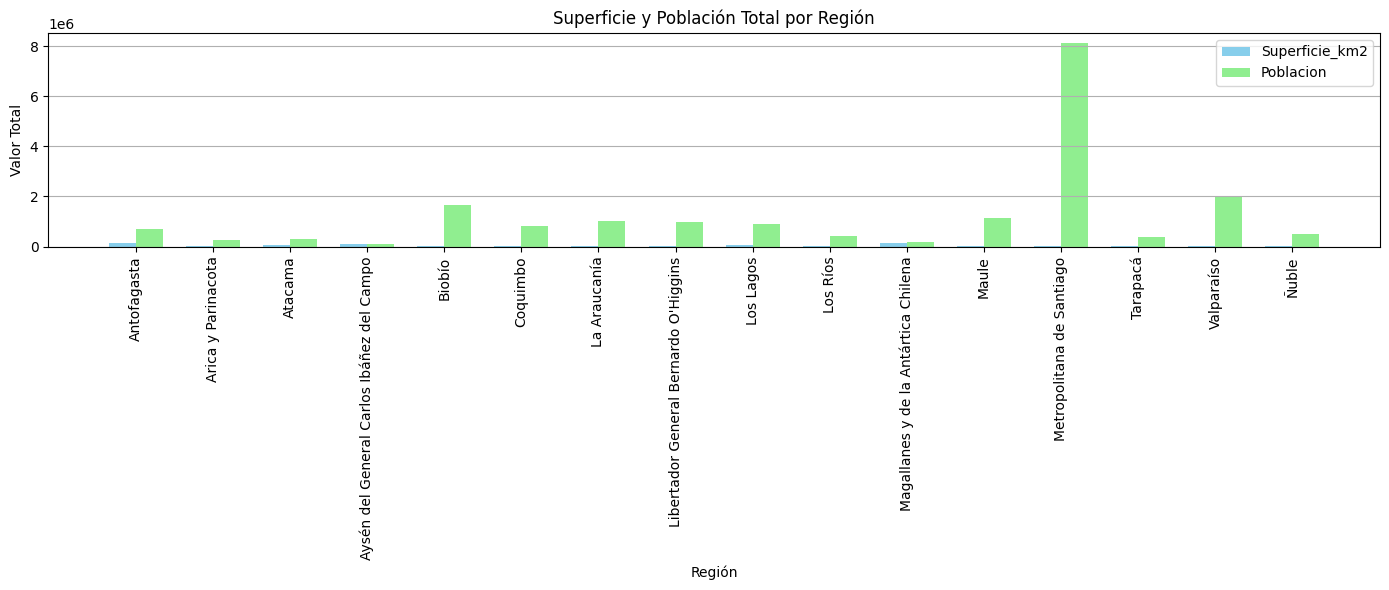


Gráfico de barras de superficie y población total generado y guardado en Google Drive.


In [12]:

# Generar gráfico de barras para Superficie_km2 y Poblacion total por región
x = np.arange(len(agrupado_region['Region']))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, agrupado_region['Superficie_km2_total'], width, label='Superficie_km2', color='skyblue')
plt.bar(x + width/2, agrupado_region['Poblacion_total'], width, label='Poblacion', color='lightgreen')
plt.title('Superficie y Población Total por Región')
plt.xlabel('Región')
plt.ylabel('Valor Total')
plt.xticks(ticks=x, labels=agrupado_region['Region'], rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/_2_UNIVERSIDAD/maestria/baseDeDatos_Chile/bar_Superficie_Poblacion.png')
plt.show()

print("\nGráfico de barras de superficie y población total generado y guardado en Google Drive.")


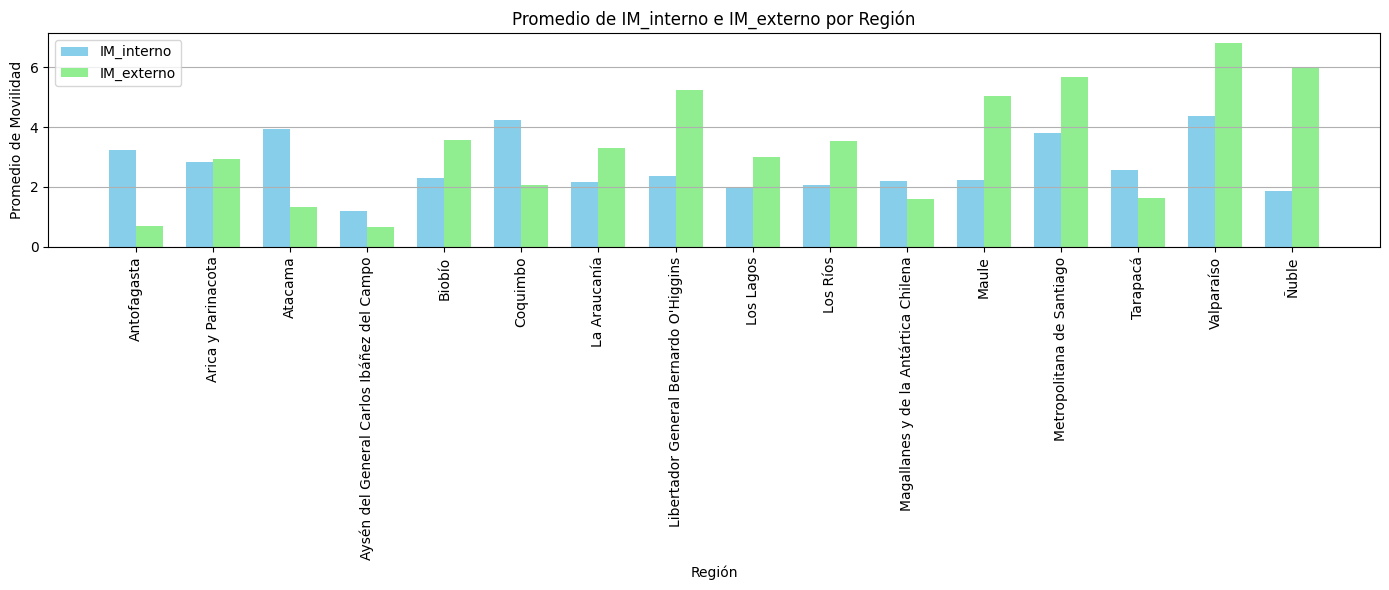


Gráfico de barras agrupado generado y guardado en Google Drive.


In [13]:

# Generar gráfico de barras agrupado para IM_interno e IM_externo por región
x = np.arange(len(agrupado_region['Region']))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, agrupado_region['IM_interno_mean'], width, label='IM_interno', color='skyblue')
plt.bar(x + width/2, agrupado_region['IM_externo_mean'], width, label='IM_externo', color='lightgreen')
plt.title('Promedio de IM_interno e IM_externo por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de Movilidad')
plt.xticks(ticks=x, labels=agrupado_region['Region'], rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/_2_UNIVERSIDAD/maestria/baseDeDatos_Chile/bar_IM_agrupado.png')
plt.show()

print("\nGráfico de barras agrupado generado y guardado en Google Drive.")



In [14]:

# Generar gráfico de dispersión para explorar la relación entre IM_interno, IM_externo y Población por región
fig = px.scatter(agrupado_region, x='IM_interno_mean', y='IM_externo_mean', size='Poblacion_total', color='Region',
                 title='Relación entre IM_interno, IM_externo y Población por Región',
                 labels={'IM_interno_mean': 'Promedio IM_interno', 'IM_externo_mean': 'Promedio IM_externo', 'Poblacion_total': 'Población Total'})
fig.update_layout(
    xaxis_title='Promedio de IM_interno',
    yaxis_title='Promedio de IM_externo',
    legend_title='Región'
)
fig.write_html('/content/drive/MyDrive/_2_UNIVERSIDAD/maestria/baseDeDatos_Chile/scatter_IM_Poblacion.html')
fig.show()

print("\nGráfico de dispersión generado y guardado en Google Drive.")


Gráfico de dispersión generado y guardado en Google Drive.


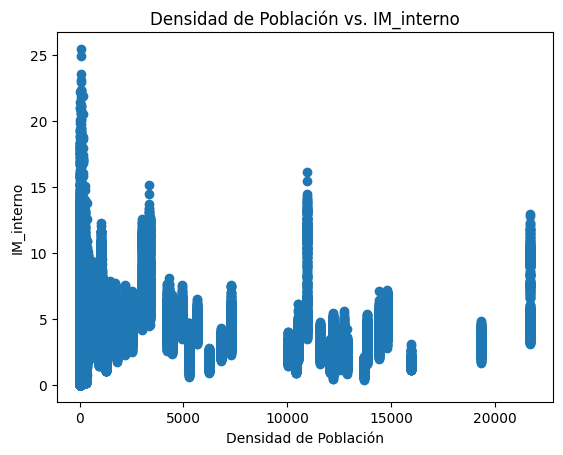

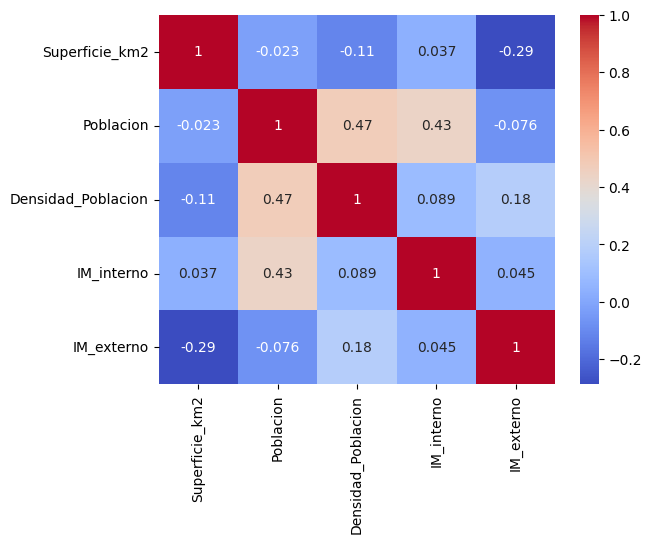

Correlación entre Densidad de Población e IM_interno: 0.08920581070955767
Valor p: 3.771409299362957e-214
Intercepto: 2.9659202725317337
Coeficiente: 6.20448390376627e-05
Coeficiente de determinación R²: 0.007957676664349322


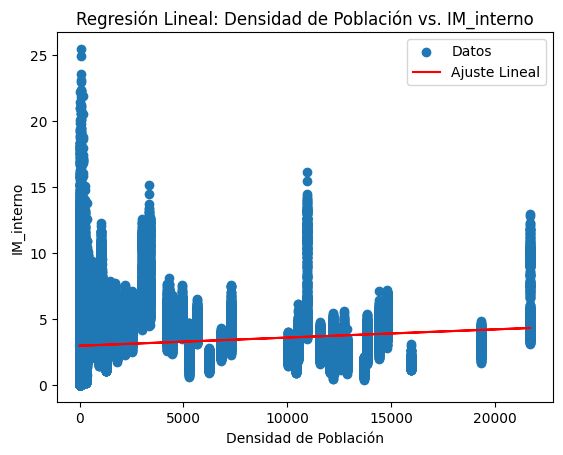

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression


# Preparación de datos
df['IM_interno'] = df['IM_interno'].replace(0, np.nan)
df['IM_externo'] = df['IM_externo'].replace(0, np.nan)
df = df.drop_duplicates(subset=['Codigo comuna', 'Fecha'])

# Calcular densidades y ratios
df['Densidad_Poblacion'] = df['Poblacion'] / df['Superficie_km2']
df['IM_interno_por_habitante'] = df['IM_interno'] / df['Poblacion']
df['IM_externo_por_habitante'] = df['IM_externo'] / df['Poblacion']

# Análisis exploratorio
plt.scatter(df['Densidad_Poblacion'], df['IM_interno'])
plt.xlabel('Densidad de Población')
plt.ylabel('IM_interno')
plt.title('Densidad de Población vs. IM_interno')
plt.show()

# Matriz de correlación
variables = ['Superficie_km2', 'Poblacion', 'Densidad_Poblacion', 'IM_interno', 'IM_externo']
corr_matrix = df[variables].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Análisis estadístico
# Preparación de datos

df2=df
df2['IM_interno'] = df2['IM_interno'].replace(0, np.nan)
df2['IM_externo'] = df2['IM_externo'].replace(0, np.nan)
df2 = df2.drop_duplicates(subset=['Codigo comuna', 'Fecha'])

# Calcular densidades y ratios
df2['Densidad_Poblacion'] = df2['Poblacion'] / df2['Superficie_km2']
df2['IM_interno_por_habitante'] = df2['IM_interno'] / df2['Poblacion']
df2['IM_externo_por_habitante'] = df2['IM_externo'] / df2['Poblacion']

# Análisis estadístico corregido
# Seleccionar las columnas y eliminar filas con NaN
data = df2[['Densidad_Poblacion', 'IM_interno']].dropna()

# Extraer las series
x = data['Densidad_Poblacion']
y = data['IM_interno']

# Calcular la correlación
corr, p_value = pearsonr(x, y)
print(f"Correlación entre Densidad de Población e IM_interno: {corr}")
print(f"Valor p: {p_value}")

# Regresión lineal
X = x.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Resultados
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")
print(f"Coeficiente de determinación R²: {model.score(X, y)}")

# Visualización de la regresión
plt.scatter(x, y, label='Datos')
plt.plot(x, model.predict(X), color='red', label='Ajuste Lineal')
plt.xlabel('Densidad de Población')
plt.ylabel('IM_interno')
plt.title('Regresión Lineal: Densidad de Población vs. IM_interno')
plt.legend()
plt.show()
